In [123]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from tqdm import tqdm

In [124]:
def plot_decision_boundary(model, x, y):

    # Red color for 0 class and blue color for 1 class
    colors = ["red" if y[i] == 0 else "blue" for i in range(len(y))]

    # Draw points
    plt.scatter(x[:, 0], x[:, 1], c=colors)

    # Determine wide screen
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1

    # Grid from 100 points
    xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, 100), torch.linspace(y_min, y_max, 100))

    # What gives model from every point
    zz = model(torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)).reshape(100, 100)

    # Draw map
    plt.contourf(xx.detach().numpy(), yy.detach().numpy(), zz.detach().numpy(), alpha=0.7, cmap=plt.cm.RdYlBu)

    # Plot
    plt.show()

In [125]:
x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)

In [126]:
y_or = torch.tensor([[0], [1], [1], [1]], dtype=torch.float32) # For OR

In [127]:
y_xor = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32) # For XOR

In [128]:
class OR(nn.Module):
    def __init__(self):
        super(OR, self).__init__()
        self.fc1 = nn.Linear(2, 1)

    def forward(self, x):
        # Преобразуем входной тензор в одномерный вектор
        x = F.sigmoid(self.fc1(x))
        return x

In [129]:
model = OR()
optimizer = Adam(params=model.parameters(), lr=1e-3)
loss_func = nn.BCELoss()

In [130]:
losses = []
for epoch in tqdm(range(5000)):
    outputs = model(x)
    loss = loss_func(outputs, y_or)
    loss.backward()
    losses.append(loss.item())
    optimizer.step()
    optimizer.zero_grad()

100%|██████████| 5000/5000 [00:02<00:00, 1729.43it/s]


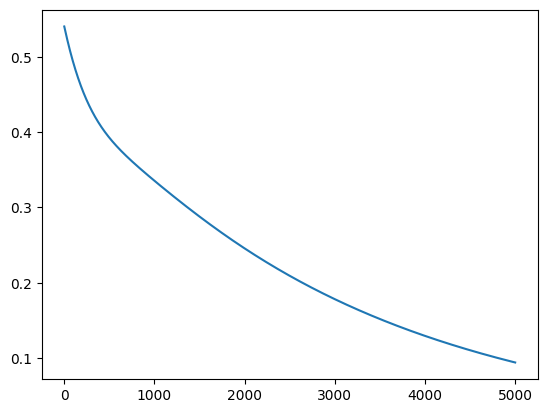

In [131]:
plt.plot(losses)

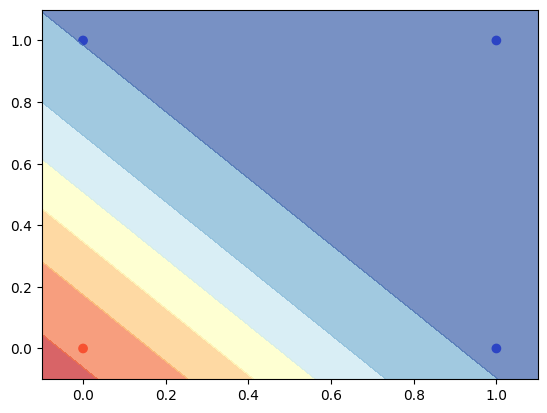

In [132]:
plot_decision_boundary(model, x, y_or)

In [133]:
print("Result for OR operation")
print("x\ty\toutput")
for i in range(4):
    print(f"{x[i].detach().numpy()}\t{y_or[i].detach().numpy()}\t{round(model_or(x[i]).item())}")

Result for OR operation
x	y	output
[0. 0.]	[0.]	0
[0. 1.]	[1.]	1
[1. 0.]	[1.]	1
[1. 1.]	[1.]	1


In [134]:
class False_XOR(nn.Module):
    def __init__(self):
        super(False_XOR, self).__init__()
        self.fc1 = nn.Linear(2, 1)

    def forward(self, x):
        # Преобразуем входной тензор в одномерный вектор
        x = F.sigmoid(self.fc1(x))
        return x

In [135]:
model = False_XOR()
optimizer = Adam(params=model.parameters(), lr=1e-3)
loss_func = nn.BCELoss()

In [136]:
losses = []
for epoch in tqdm(range(5000)):
    outputs = model(x)
    loss = loss_func(outputs, y_xor)
    loss.backward()
    losses.append(loss.item())
    optimizer.step()
    optimizer.zero_grad()

100%|██████████| 5000/5000 [00:02<00:00, 1741.46it/s]


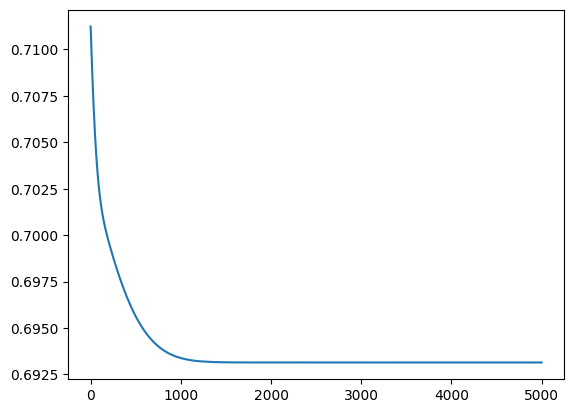

In [137]:
plt.plot(losses)

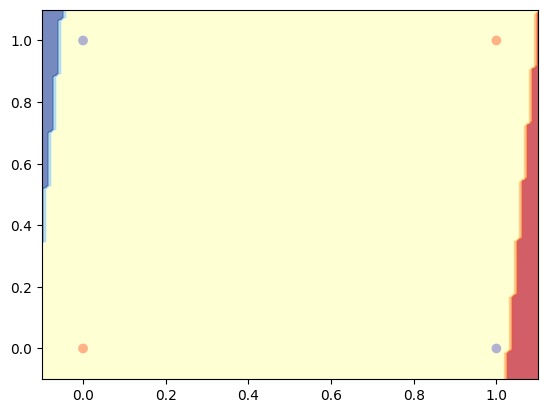

In [138]:
plot_decision_boundary(model, x, y_xor)

In [139]:
print("Result for XOR operation (False)")
print("x\ty\toutput")
for i in range(4):
    print(f"{x[i].detach().numpy()}\t{y_xor[i].detach().numpy()}\t{round(model_xor1(x[i]).item())}")

Result for XOR operation (False)
x	y	output
[0. 0.]	[0.]	0
[0. 1.]	[1.]	0
[1. 0.]	[1.]	0
[1. 1.]	[0.]	0


In [140]:
class XOR(nn.Module):
    def __init__(self):
        super(XOR, self).__init__()
        self.fc1 = nn.Linear(2, 2)
        self.fc2 = nn.Linear(2, 1)

    def forward(self, x):
        # Преобразуем входной тензор в одномерный вектор
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        return x

In [141]:
model = XOR()
optimizer = Adam(params=model.parameters(), lr=1e-3)
loss_func = nn.BCELoss()

In [142]:
losses = []
for epoch in tqdm(range(5000)):
    outputs = model(x)
    loss = loss_func(outputs, y_xor)
    loss.backward()
    losses.append(loss.item())
    optimizer.step()
    optimizer.zero_grad()

100%|██████████| 5000/5000 [00:03<00:00, 1255.41it/s]


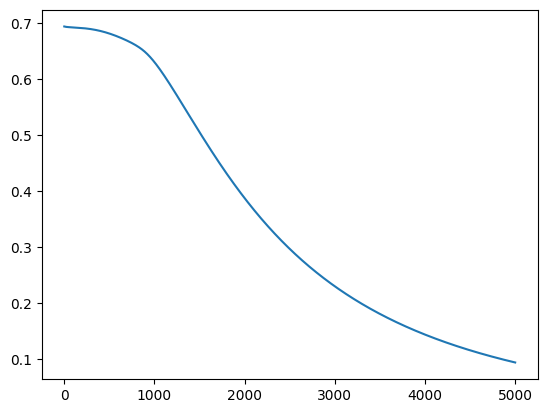

In [143]:
plt.plot(losses)

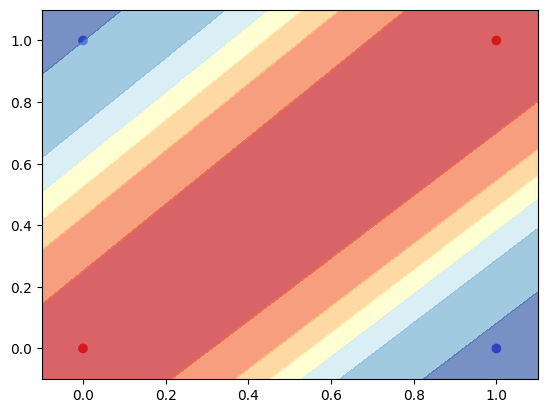

In [144]:
plot_decision_boundary(model, x, y_xor)

In [148]:
print("Result for XOR operation")
print("x\ty\toutput")
for i in range(4):
    print(f"{x[i].detach().numpy()}\t{y_xor[i].detach().numpy()}\t{round(model_xor2(x[i]).item())}")

Result for XOR operation
x	y	output
[0. 0.]	[0.]	0
[0. 1.]	[1.]	1
[1. 0.]	[1.]	1
[1. 1.]	[0.]	0


In [149]:
def sigmoid(input):
  return 1 / (1 + np.exp(-input))

def tanh(input):
  return (np.exp(2*input) - 1) / (np.exp(2*input) + 1)

def relu(input):
  return (max(0, input))

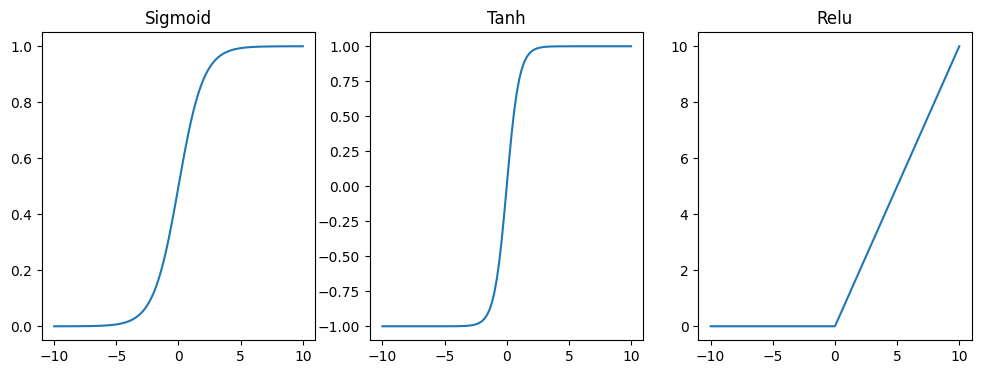

In [150]:
act_x = np.linspace(-10, 10, 101)
sigmoid_y = [sigmoid(x) for x in act_x]
tanh_y = [tanh(x) for x in act_x]
relu_y = [relu(x) for x in act_x]

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(act_x, sigmoid_y)
plt.title("Sigmoid")

plt.subplot(1, 3, 2)
plt.plot(act_x, tanh_y)
plt.title("Tanh")

plt.subplot(1, 3, 3)
plt.plot(act_x, relu_y)
plt.title("Relu")
plt.show()